<a href="https://colab.research.google.com/github/kavinponnusamy01/Healthcare-/blob/main/Consumption_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Electricity Consumption Analysis***

In [6]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/household_power_consumption.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:

# Display settings for better readability
pd.set_option('display.max_columns', 100)

In [8]:
data_path = '/content/household_power_consumption.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [9]:
# Basic information about the dataset
print("DataFrame shape:", df.shape)
print("\nDataFrame info:")
print(df.info())

# Summary statistics of numerical features
df.describe()

DataFrame shape: (260640, 10)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB
None


,index,Sub_metering_3
count,260640.000000,256869.000000
mean,130319.500000,5.831825
std,75240.431418,8.186709
min,0.000000,0.000000
25%,65159.750000,0.000000
50%,130319.500000,0.000000
75%,195479.250000,17.000000
max,260639.000000,20.000000


In [10]:
cols_to_convert = [
    "Global_active_power", "Global_reactive_power", "Voltage",
    "Global_intensity", "Sub_metering_1", "Sub_metering_2"
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts invalid strings to NaN

In [11]:
df['Date'] = pd.DatetimeIndex(df['Date'])

In [12]:
print("\nMissing values\n", df.isnull().sum())


Missing values
 index                       0
Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64


In [13]:
# Combine Date and Time into a full datetime
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])

# Set DateTime as the index
df.set_index('DateTime', inplace=True)

# Optional: Drop original 'Date' and 'Time' columns to avoid redundancy
df.drop(columns=['Date', 'Time'], inplace=True)

In [14]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['weekday'] = df.index.weekday

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260640 entries, 2007-01-01 00:00:00 to 2007-06-30 23:59:00
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Global_active_power    256869 non-null  float64
 2   Global_reactive_power  256869 non-null  float64
 3   Voltage                256869 non-null  float64
 4   Global_intensity       256869 non-null  float64
 5   Sub_metering_1         256869 non-null  float64
 6   Sub_metering_2         256869 non-null  float64
 7   Sub_metering_3         256869 non-null  float64
 8   hour                   260640 non-null  int32  
 9   day                    260640 non-null  int32  
 10  month                  260640 non-null  int32  
 11  weekday                260640 non-null  int32  
dtypes: float64(7), int32(4), int64(1)
memory usage: 21.9 MB
None


In [16]:
df=df.dropna()

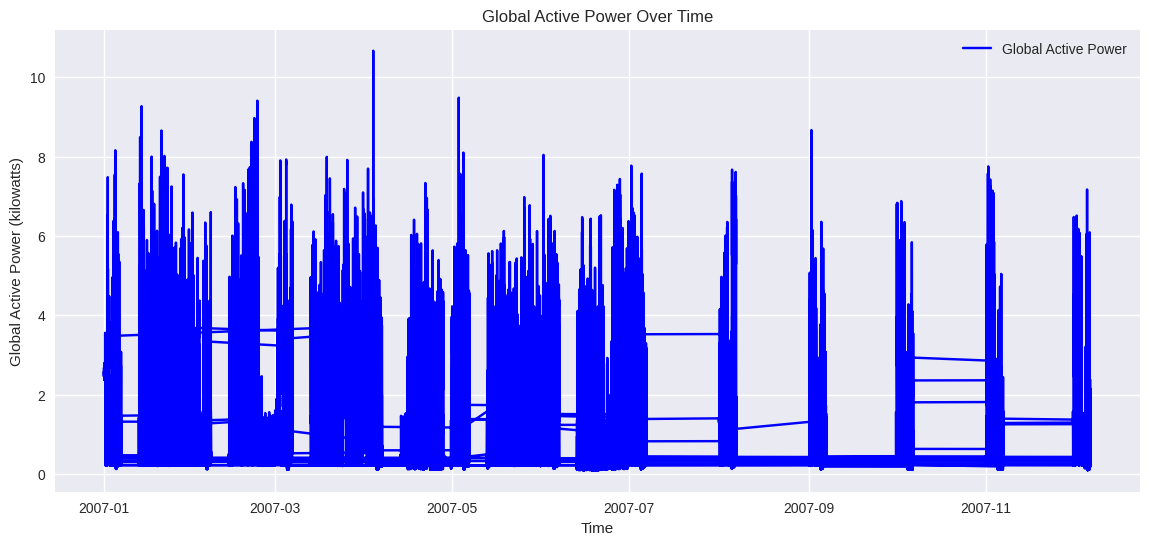

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Global_active_power'], color='blue', label='Global Active Power')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()

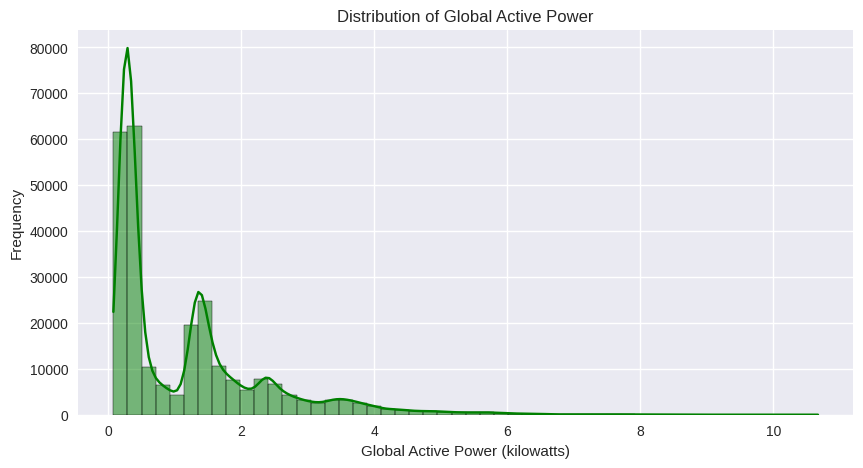

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='green')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

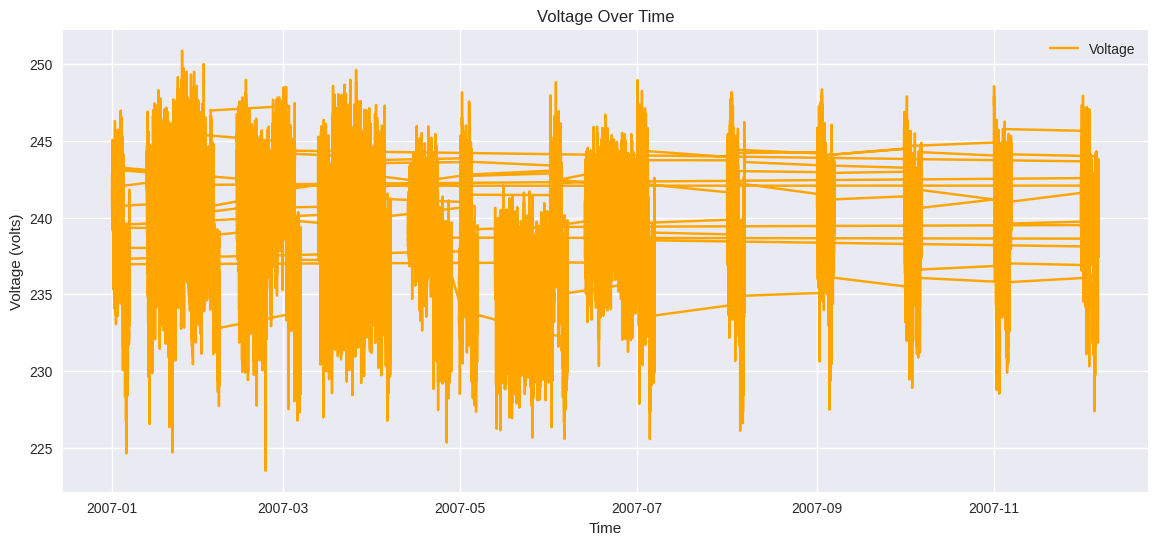

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Voltage'], color='orange', label='Voltage')
plt.title('Voltage Over Time')
plt.xlabel('Time')
plt.ylabel('Voltage (volts)')
plt.legend()
plt.show()

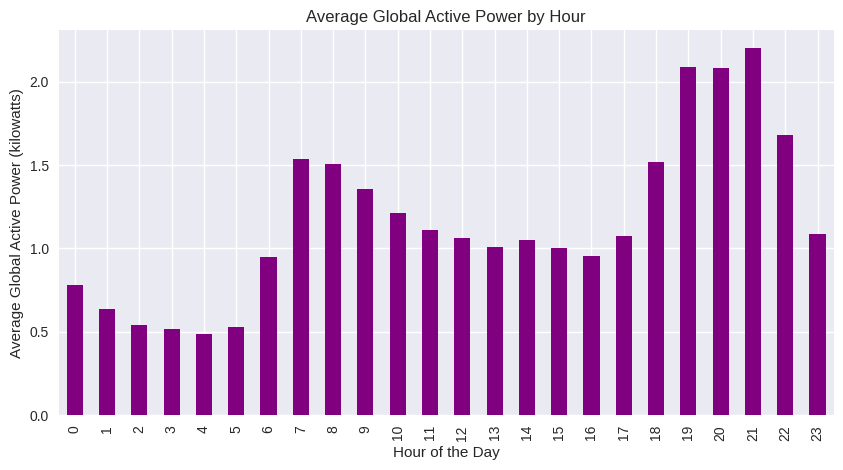

In [20]:
hourly_avg = df.groupby('hour')['Global_active_power'].mean()
plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='purple')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.show()

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature (hour) and the target (Global Active Power)
X = df[['hour']]
y = df['Global_active_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.2657809093946006


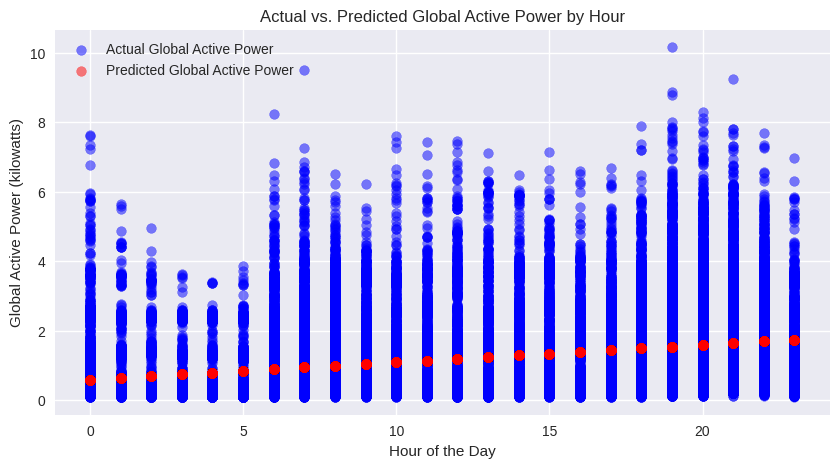

In [22]:
# Plot Actual vs Predicted Global Active Power by hour
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Global Active Power', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted Global Active Power', alpha=0.5)
plt.title('Actual vs. Predicted Global Active Power by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.show()